In [73]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("matchresultupdate2.xlsx")
df = df.dropna()
df = df[['Team', 'Opposition', 'winner']]

# Convert categorical features into dummy variables
df_encoded = pd.get_dummies(df, prefix=['Team', 'Opposition'], columns=['Team', 'Opposition'])

# Prepare features and labels
X = df_encoded.drop('winner', axis=1)
y = df_encoded['winner']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [74]:

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

log_acc = accuracy_score(y_test, log_preds)
print("Logistic Regression Accuracy:", log_acc)
print(classification_report(y_test, log_preds))


Logistic Regression Accuracy: 0.5985130111524164
               precision    recall  f1-score   support

  Afghanistan       0.57      0.80      0.67         5
    Australia       0.63      0.86      0.73        14
   Bangladesh       0.25      0.67      0.36         3
       Canada       0.00      0.00      0.00         2
      England       0.82      0.74      0.78        19
        India       0.55      0.79      0.65        14
      Ireland       0.50      0.20      0.29         5
      Namibia       0.75      1.00      0.86         3
        Nepal       0.50      1.00      0.67         1
  Netherlands       0.60      0.43      0.50         7
  New Zealand       0.38      1.00      0.55         3
         Oman       0.33      0.67      0.44         3
       P.N.G.       0.00      0.00      0.00         1
     Pakistan       0.80      0.60      0.69        20
     Scotland       0.50      1.00      0.67         1
 South Africa       1.00      0.25      0.40         8
    Sri Lanka  

C:\Users\saksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [75]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.5799256505576208
               precision    recall  f1-score   support

  Afghanistan       0.45      1.00      0.62         5
    Australia       0.63      0.86      0.73        14
   Bangladesh       0.17      0.33      0.22         3
       Canada       0.00      0.00      0.00         2
      England       0.88      0.74      0.80        19
        India       0.55      0.79      0.65        14
      Ireland       0.00      0.00      0.00         5
      Namibia       0.75      1.00      0.86         3
        Nepal       0.50      1.00      0.67         1
  Netherlands       0.33      0.14      0.20         7
  New Zealand       0.38      1.00      0.55         3
         Oman       0.00      0.00      0.00         3
       P.N.G.       0.00      0.00      0.00         1
     Pakistan       0.80      0.60      0.69        20
     Scotland       0.50      1.00      0.67         1
 South Africa       0.75      0.38      0.50         8
    Sri Lanka       0

C:\Users\saksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

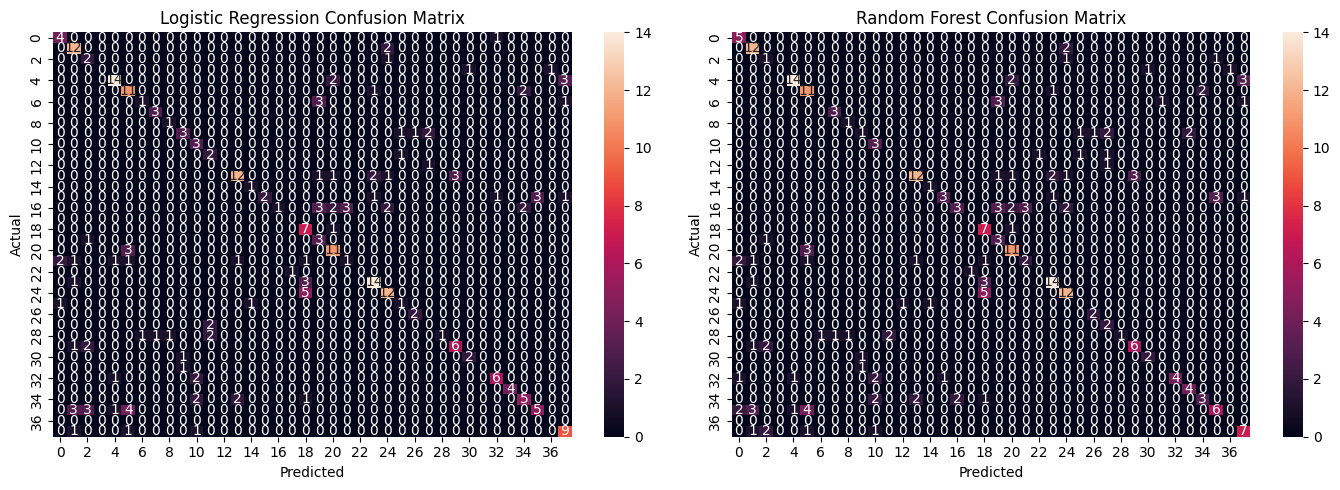

In [76]:

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [77]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Fit the model with data
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [78]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)


In [79]:
import numpy as np
import pandas as pd

# Combine model predictions
avg_proba = (log_model.predict_proba(X_test) + rf.predict_proba(X_test)) / 2
avg_preds = np.argmax(avg_proba, axis=1)

# Decode labels and clean whitespace
final_preds = label_enc.inverse_transform(avg_preds)
final_preds = [team.strip() for team in final_preds]  # Remove spaces

# Calculate win percentage
final_results = pd.Series(final_preds).value_counts(normalize=True)/2 * 1000

# Create final DataFrame
final_df = final_results.reset_index()
final_df.columns = ['Team', 'Win %']

# Remove duplicates if any
final_df = final_df.drop_duplicates(subset='Team', keep='first').reset_index(drop=True)

# Print formatted results
print("📊 Final Combined Prediction Results (Averaged):")
for i, row in final_df.iterrows():
    print(f"{i+1}. 🏆 {row['Team']}: {row['Win %']:.2f}% win chance")


📊 Final Combined Prediction Results (Averaged):
1. 🏆 India: 70.63% win chance
2. 🏆 Australia: 66.91% win chance
3. 🏆 England: 65.06% win chance
4. 🏆 West Indies: 53.90% win chance
5. 🏆 Pakistan: 42.75% win chance
6. 🏆 Afghanistan: 31.60% win chance
7. 🏆 New Zealand: 31.60% win chance
8. 🏆 Sri Lanka: 24.16% win chance
9. 🏆 South Africa: 20.45% win chance
10. 🏆 Bangladesh: 18.59% win chance
11. 🏆 Scotland: 14.87% win chance
12. 🏆 Oman: 14.87% win chance
13. 🏆 Namibia: 13.01% win chance
14. 🏆 Nepal: 9.29% win chance
15. 🏆 Netherlands: 7.43% win chance
16. 🏆 Ireland: 5.58% win chance
17. 🏆 P.N.G.: 3.72% win chance
18. 🏆 U.S.A.: 3.72% win chance
19. 🏆 Canada: 1.86% win chance


In [80]:
top5 = final_results.sort_values(ascending=False).head(5)
normalized_top5 = (top5 / top5.sum()) * 100
print("🔝 Top 5 Teams (Re-Normalized):")
print(normalized_top5)


🔝 Top 5 Teams (Re-Normalized):
India          23.602484
Australia      22.360248
England        21.739130
West Indies    18.012422
Pakistan       14.285714
Name: proportion, dtype: float64


In [81]:
# Get top predicted winner
top_team = final_results.idxmax()
top_win_pct = final_results.max()

# Display nicely
from IPython.display import Markdown, display
display(Markdown(f"## 🏆 **Final Predicted T20 World Cup Winner:**"))
display(Markdown(f"### 🥇 `{top_team}` with a winning probability of **{top_win_pct:.2f}%**"))


## 🏆 **Final Predicted T20 World Cup Winner:**

### 🥇 `India` with a winning probability of **70.63%**

In [83]:
final_results = pd.Series(final_preds).value_counts(normalize=True) * 100
final_results = final_results.reset_index()
final_results.columns = ['index', 'win_percent']

final_results['win_percent'] = final_results['win_percent'] * 10/2


final_results.to_excel("final_combined_results.xlsx", index=False)
